Aperçu des données :
   Index  PAO  PAA  VIO  VIA  POT  LEC  RAI  PLP
0  AGRI  167    1  163   23   41    8    6    6
1  SAAG  162    2  141   12   40   12    4   15
2  PRIN  119    6   69   56   39    5   13   41
3  CSUP   87   11   63  111   27    3   18   39
4  CMOY  103    5   68   77   32    4   11   30
Indicateurs statistiques :
       min    max     mean        std
PAO  87.0  167.0  127.125  27.905133
PAA   1.0   11.0    4.875   3.181981
VIO  63.0  163.0   96.125  38.790417
VIA  12.0  111.0   58.875  31.316073
POT  27.0   53.0   38.625   7.872874
LEC   3.0   12.0    6.625   2.825269
RAI   4.0   18.0   10.125   4.454131
PLP   6.0   41.0   24.375  12.246720
Matrice de corrélation :
           PAO       PAA       VIO       VIA       POT       LEC       RAI  \
PAO  1.000000 -0.773664  0.926188 -0.905793  0.656352  0.888559 -0.833427   
PAA -0.773664  1.000000 -0.604013  0.904441 -0.332888 -0.673371  0.958818   
VIO  0.926188 -0.604013  1.000000 -0.750161  0.517075  0.791726 -0.66900

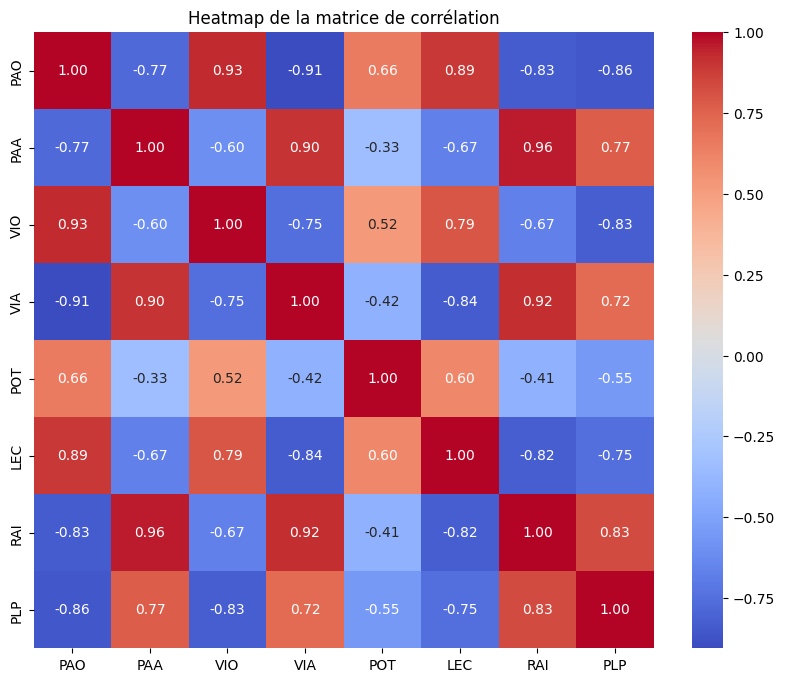

Tableau des valeurs propres :
    Valeur propre  Variance expliquée (%)  Variance cumulée (%)
0   3.098178e+03            8.816671e+01             88.166711
1   3.045501e+02            8.666763e+00             96.833475
2   6.832742e+01            1.944434e+00             98.777909
3   3.891328e+01            1.107378e+00             99.885287
4   2.177913e+00            6.197817e-02             99.947265
5   1.798098e+00            5.116956e-02             99.998435
6   5.499796e-02            1.565110e-03            100.000000
7   4.668235e-31            1.328468e-32            100.000000
Les 2 axes principaux :
 [[ 0.49620433 -0.04441498  0.66688264 -0.50851371  0.07949412  0.04442889
  -0.06654125 -0.18912681]
 [-0.0717973   0.08797802  0.62631447  0.7591994   0.04589115 -0.02140562
   0.10769038 -0.06549857]]
Tableau des individus :
               F1         F2
Index                      
AGRI   86.798537  12.283542
SAAG   73.724496 -10.335987
PRIN  -24.086768 -19.216460
CSUP  -73

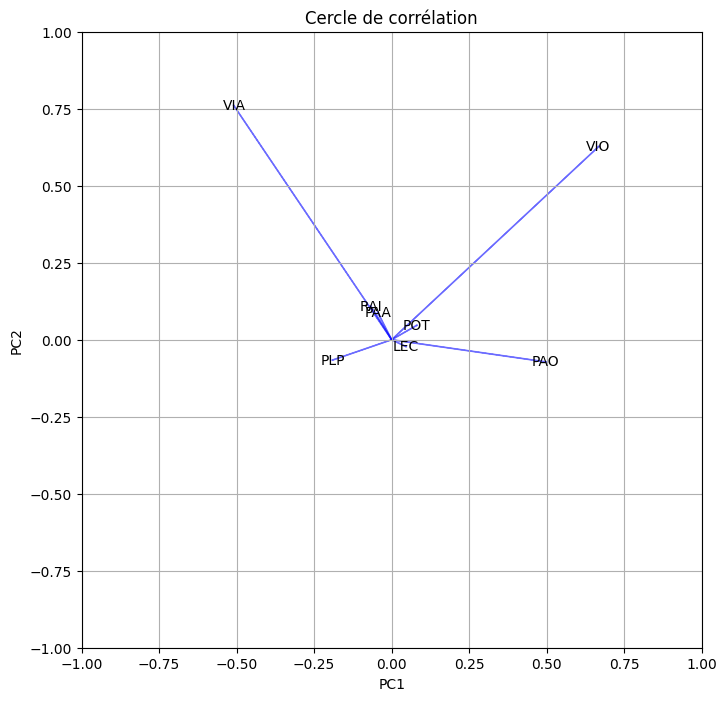

Corrélations entre les variables et les composantes principales :
           CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
PAO  0.496204 -0.071797  0.415313  0.211764  0.501452  0.348907  0.012270   
PAA -0.044415  0.087978 -0.010104  0.166312  0.073053  0.549259 -0.581728   
VIO  0.666883  0.626314 -0.323221  0.058114 -0.171345 -0.142573 -0.021711   
VIA -0.508514  0.759199  0.239833 -0.025564  0.117047  0.122939  0.002534   
POT  0.079494  0.045891  0.729694  0.353234 -0.366735 -0.359817 -0.043228   
LEC  0.044429 -0.021406  0.047889  0.022567 -0.607066  0.639877  0.460533   
RAI -0.066541  0.107690 -0.045376  0.227053  0.438220 -0.001775  0.665988   
PLP -0.189127 -0.065499 -0.358630  0.864077 -0.071342 -0.047152 -0.058863   

          CP8  
PAO  0.397438  
PAA -0.563112  
VIO -0.070650  
VIA  0.279350  
POT -0.261753  
LEC  0.068580  
RAI -0.542939  
PLP  0.271880  


In [13]:
import pandas as pd

# Charger les données depuis le fichier CSV
chemin_fichier = './ACP Data.csv'
data = pd.read_csv(chemin_fichier)

# Extraire les noms des individus entre parenthèses
data['Index'] = data['Index'].str.extract(r'\((.*?)\)')

# Renommer les colonnes pour ne garder que la partie entre parenthèses
data.columns = [col.split('(')[-1].strip(')') if '(' in col else col for col in data.columns]

# Afficher les premières lignes du dataset
print("Aperçu des données :\n", data.head())

# Exclure la colonne catégorielle "Index"
donnees_numeriques = data.iloc[:, 1:]

# Calculer les indicateurs statistiques
statistiques = donnees_numeriques.describe().loc[['min', 'max', 'mean', 'std']].T
print("Indicateurs statistiques :\n", statistiques)

# Importer Seaborn pour la visualisation
import seaborn as sns

# Calculer la matrice de corrélation
matrice_correlation = donnees_numeriques.corr()
print("Matrice de corrélation :\n", matrice_correlation)

# Afficher une heatmap de la matrice de corrélation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la matrice de corrélation')
plt.show()

# Effectuer l'ACP
from sklearn.decomposition import PCA

# Initialiser et ajuster le modèle PCA
acp = PCA()
acp.fit(donnees_numeriques)

# Extraire les valeurs propres et la variance expliquée
valeurs_propres = acp.explained_variance_
variance_expliquee = acp.explained_variance_ratio_
variance_cumulee = variance_expliquee.cumsum()

# Créer un tableau des valeurs propres
tableau_valeurs_propres = pd.DataFrame({
    'Valeur propre': valeurs_propres,
    'Variance expliquée (%)': variance_expliquee * 100,
    'Variance cumulée (%)': variance_cumulee * 100
})
print("Tableau des valeurs propres :\n", tableau_valeurs_propres)

# Sélectionner les deux axes principaux avec les plus grandes valeurs propres
axes_principaux = acp.components_[:2]
print("Les 2 axes principaux :\n", axes_principaux)

# Projeter les individus sur les deux premiers axes
individus_acp = acp.transform(donnees_numeriques)

# Créer un tableau des individus avec leurs coordonnées sur les deux premiers axes
tableau_individus = pd.DataFrame(individus_acp[:, :2], columns=['F1', 'F2'], index=data['Index'])
print("Tableau des individus :\n", tableau_individus)

# Cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
for i, variable in enumerate(donnees_numeriques.columns):
    ax.arrow(0, 0, axes_principaux[0, i], axes_principaux[1, i], color='blue', alpha=0.5)
    ax.text(axes_principaux[0, i], axes_principaux[1, i], variable, color='black', ha='center', va='center')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle de corrélation')
plt.grid()
plt.show()

# Calculer les corrélations entre les variables initiales et les composantes principales
correlations = pd.DataFrame(acp.components_.T, columns=[f'CP{i+1}' for i in range(acp.n_components_)], index=donnees_numeriques.columns)
print("Corrélations entre les variables et les composantes principales :\n", correlations)
